In [2]:
!pip install pydicom

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 12.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
import pydicom
import matplotlib.pyplot as plt

# Set the base directory where your DICOM files are stored
base_dir = "D:/Semester notes/Semester 8/capstone project/Application/TCGA-LUAD/manifest-1Rd7jPNd5199284876140322680"

# Function to load and display a DICOM image
def show_dicom_image(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)  # Read DICOM file
    plt.imshow(dicom_data.pixel_array, cmap='gray')  # Display the image
    plt.title(f"Patient ID: {dicom_data.PatientID}")  # Add title
    plt.axis('off')
    plt.show()

# Find a sample DICOM file
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".dcm"):
            dicom_path = os.path.join(root, file)
            print(f"Found DICOM file: {dicom_path}")
            show_dicom_image(dicom_path)
            break

In [10]:
import os

base_dir = "D:/Semester notes/Semester 8/capstone project/Application/TCGA-LUAD/manifest-1Rd7jPNd5199284876140322680"

if os.path.exists(base_dir):
    print("✅ Directory exists!")
else:
    print("❌ Directory not found. Check the path!")

❌ Directory not found. Check the path!


In [11]:
import os

# Correct the base directory
base_dir = r"D:\Semester notes\Semester 8\capstone project\Applicatrion\TCGA-LUAD\manifest-1Rd7jPNd5199284876140322680"

# Check if the base directory exists
if not os.path.exists(base_dir):
    print("❌ Directory not found. Check the path again!")
else:
    print("✅ Directory exists! Searching for DICOM files...\n")

    # Search recursively for DICOM files
    found_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.lower().endswith(".dcm"):  # Case insensitive check
                dicom_path = os.path.join(root, file)
                found_files.append(dicom_path)

    # Print results
    if found_files:
        print(f"✅ Found {len(found_files)} DICOM files!")
        print(f"🔹 Example file: {found_files[0]}")  # Show the first found file
    else:
        print("⚠️ No DICOM files found. Double-check the folder structure.")

✅ Directory exists! Searching for DICOM files...

✅ Found 48931 DICOM files!
🔹 Example file: D:\Semester notes\Semester 8\capstone project\Applicatrion\TCGA-LUAD\manifest-1Rd7jPNd5199284876140322680\TCGA-LUAD\TCGA-17-Z011\06-30-1982-32248\2.000000-43644\1-1.dcm


📸 Displaying DICOM image: D:\Semester notes\Semester 8\capstone project\Applicatrion\TCGA-LUAD\manifest-1Rd7jPNd5199284876140322680\TCGA-LUAD\TCGA-17-Z011\06-30-1982-32248\2.000000-43644\1-1.dcm


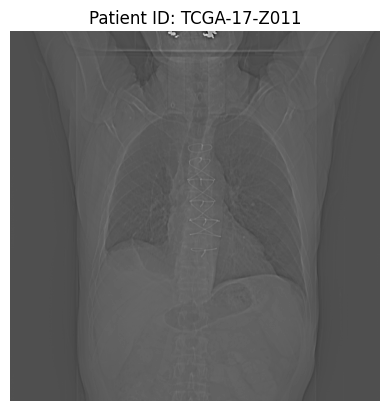

In [12]:
import pydicom
import matplotlib.pyplot as plt

# Select the first DICOM file found
dicom_path = found_files[0]  # First DICOM file in the list

print(f"📸 Displaying DICOM image: {dicom_path}")

# Load DICOM file
dicom_data = pydicom.dcmread(dicom_path)

# Display the image
plt.imshow(dicom_data.pixel_array, cmap="gray")
plt.title(f"Patient ID: {dicom_data.PatientID}")
plt.axis("off")
plt.show()

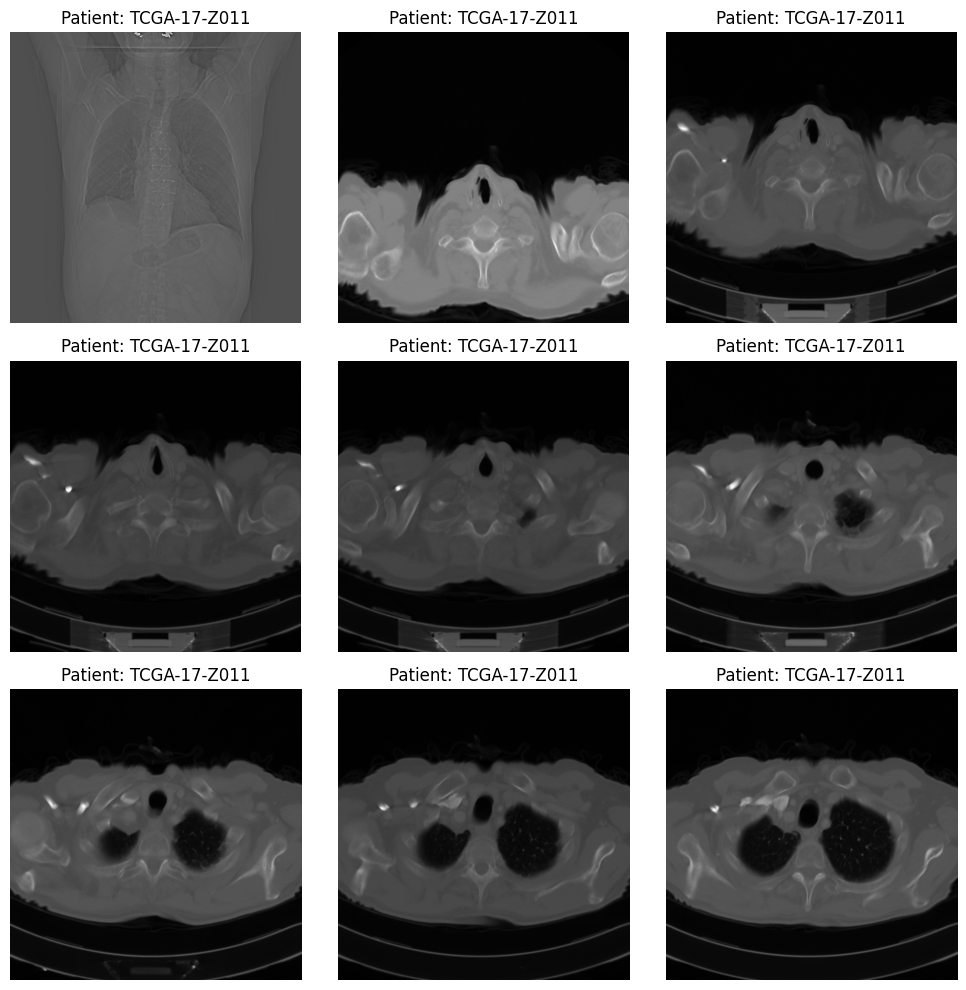


📌 Extracted Metadata:

🔹 File: D:\Semester notes\Semester 8\capstone project\Applicatrion\TCGA-LUAD\manifest-1Rd7jPNd5199284876140322680\TCGA-LUAD\TCGA-17-Z011\06-30-1982-32248\2.000000-43644\1-1.dcm
   - Patient ID: TCGA-17-Z011
   - Study Date: 19820630
   - Modality: CT
   - Image Size: 512 x 512
   - Slice Thickness: 002.000000E+00

🔹 File: D:\Semester notes\Semester 8\capstone project\Applicatrion\TCGA-LUAD\manifest-1Rd7jPNd5199284876140322680\TCGA-LUAD\TCGA-17-Z011\06-30-1982-32248\3.000000-72707\1-1.dcm
   - Patient ID: TCGA-17-Z011
   - Study Date: 19820630
   - Modality: CT
   - Image Size: 512 x 512
   - Slice Thickness: 008.000000E+00

🔹 File: D:\Semester notes\Semester 8\capstone project\Applicatrion\TCGA-LUAD\manifest-1Rd7jPNd5199284876140322680\TCGA-LUAD\TCGA-17-Z011\06-30-1982-32248\5.000000-07044\1-01.dcm
   - Patient ID: TCGA-17-Z011
   - Study Date: 19820630
   - Modality: CT
   - Image Size: 512 x 512
   - Slice Thickness: 008.000000E+00

🔹 File: D:\Semester notes\S

In [13]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For resizing images

# Set the base directory where your DICOM files are stored
base_dir = r"D:\Semester notes\Semester 8\capstone project\Applicatrion\TCGA-LUAD\manifest-1Rd7jPNd5199284876140322680"

# Function to load DICOM files
def load_dicom_images(base_dir, max_images=9):
    dicom_files = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                dicom_files.append(dicom_path)
                if len(dicom_files) >= max_images:  # Load only max_images
                    return dicom_files
    return dicom_files

# Function to display multiple images
def show_images_grid(dicom_files):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # 3x3 grid
    axes = axes.flatten()
    
    for i, dicom_path in enumerate(dicom_files):
        dicom_data = pydicom.dcmread(dicom_path)
        img = dicom_data.pixel_array
        
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Patient: {dicom_data.PatientID}")
        axes[i].axis("off")
    
    plt.tight_layout()
    plt.show()

# Function to extract metadata
def extract_metadata(dicom_files):
    print("\n📌 Extracted Metadata:")
    for dicom_path in dicom_files[:5]:  # Show metadata for first 5 images
        dicom_data = pydicom.dcmread(dicom_path)
        print(f"\n🔹 File: {dicom_path}")
        print(f"   - Patient ID: {dicom_data.PatientID}")
        print(f"   - Study Date: {dicom_data.StudyDate}")
        print(f"   - Modality: {dicom_data.Modality}")
        print(f"   - Image Size: {dicom_data.Rows} x {dicom_data.Columns}")
        if "SliceThickness" in dicom_data:
            print(f"   - Slice Thickness: {dicom_data.SliceThickness}")

# Function to preprocess images (resize & normalize)
def preprocess_images(dicom_files, img_size=(256, 256)):
    preprocessed_images = []
    for dicom_path in dicom_files:
        dicom_data = pydicom.dcmread(dicom_path)
        img = dicom_data.pixel_array.astype(np.float32)
        img = cv2.resize(img, img_size)  # Resize to 256x256
        img = (img - np.min(img)) / (np.max(img) - np.min(img))  # Normalize (0-1)
        preprocessed_images.append(img)
    
    return np.array(preprocessed_images)

# Run the functions
dicom_files = load_dicom_images(base_dir)
if dicom_files:
    show_images_grid(dicom_files)
    extract_metadata(dicom_files)
    processed_images = preprocess_images(dicom_files)
    print(f"\n✅ Preprocessed {len(processed_images)} images (Resized to 256x256 & Normalized)")
else:
    print("❌ No DICOM files found.")

In [14]:
import os
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set paths
base_dir = "D:/Semester notes/Semester 8/capstone project/Applicatrion/TCGA-LUAD/manifest-1Rd7jPNd5199284876140322680"
save_dir = "processed_images"
os.makedirs(save_dir, exist_ok=True)

# Function to preprocess DICOM images
def preprocess_dicom(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    pixel_array = dicom_data.pixel_array.astype(np.float32)
    
    # Normalize to [0,1]
    pixel_array -= pixel_array.min()
    pixel_array /= pixel_array.max()
    
    # Resize to 256x256
    pixel_array = cv2.resize(pixel_array, (256, 256))
    return pixel_array, dicom_data.PatientID

# Process and save images
dicom_files = []
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".dcm"):
            dicom_files.append(os.path.join(root, file))

print(f"✅ Found {len(dicom_files)} DICOM files. Processing...")

for dicom_path in tqdm(dicom_files[:100]):  # Limit for testing
    try:
        img, patient_id = preprocess_dicom(dicom_path)
        npy_path = os.path.join(save_dir, f"{patient_id}.npy")
        png_path = os.path.join(save_dir, f"{patient_id}.png")
        
        np.save(npy_path, img)
        plt.imsave(png_path, img, cmap='gray')
    except Exception as e:
        print(f"❌ Error processing {dicom_path}: {e}")

print("✅ Preprocessing complete! Images saved in", save_dir)

✅ Found 48931 DICOM files. Processing...


100%|██████████| 100/100 [00:05<00:00, 17.07it/s]

✅ Preprocessing complete! Images saved in processed_images


In [2]:
import os
image_folder = "D:/Semester notes/Semester 8/capstone project/Applicatrion/processed_images"

if os.path.exists(image_folder):
    print(f"✅ Found {len(os.listdir(image_folder))} processed images")
else:
    print("❌ Folder not found!")

✅ Found 2 processed images


In [3]:
import os
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paths
base_dir = "D:/Semester notes/Semester 8/capstone project/Applicatrion/TCGA-LUAD/manifest-1Rd7jPNd5199284876140322680"
output_dir = "D:/Semester notes/Semester 8/capstone project/Applicatrion/processed_images"
os.makedirs(output_dir, exist_ok=True)

# Function to preprocess DICOM

def preprocess_dicom(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    image = dicom_data.pixel_array
    image = cv2.resize(image, (256, 256))  # Resize to 256x256
    image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize
    return image

# Process all DICOM files
dicom_files = []
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".dcm"):
            dicom_files.append(os.path.join(root, file))

print(f"✅ Found {len(dicom_files)} DICOM files. Processing...")

# Process & save images
for dicom_path in tqdm(dicom_files):
    try:
        image = preprocess_dicom(dicom_path)
        filename = os.path.basename(dicom_path).replace(".dcm", "")
        np.save(os.path.join(output_dir, f"{filename}.npy"), image)  # Save as .npy
        plt.imsave(os.path.join(output_dir, f"{filename}.png"), image, cmap='gray')  # Save as .png
    except Exception as e:
        print(f"❌ Error processing {dicom_path}: {e}")

print(f"✅ Processing complete! Images saved in {output_dir}")

✅ Found 48931 DICOM files. Processing...


 16%|█▌        | 7645/48931 [07:56<52:31, 13.10it/s]  C:\Users\tashi\AppData\Local\Temp\ipykernel_20468\4208499619.py:19: RuntimeWarning: overflow encountered in short_scalars
  image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize
100%|██████████| 48931/48931 [50:02<00:00, 16.30it/s]  

✅ Processing complete! Images saved in D:/Semester notes/Semester 8/capstone project/Applicatrion/processed_images
